In [1]:
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

# Feature Engineering

Load and convert image files into feature matrix

# Traing Data

In [2]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/train_another/damage/*.jpeg")
train_damage = np.array([np.array(imread(img)) for img in path])

In [3]:
train_damage.shape

(5000, 128, 128, 3)

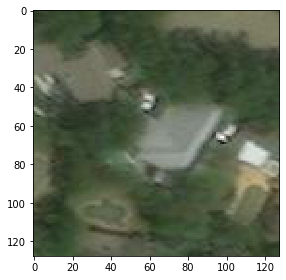

In [4]:
imshow(train_damage[0])

In [5]:
train_damage_scale = train_damage/128

In [6]:
train_damage_scale.shape

(5000, 128, 128, 3)

/Users/manishatakale/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


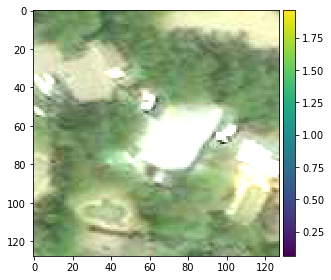

In [7]:
imshow(train_damage_scale[0])

In [8]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/train_another/no_damage/*.jpeg")
train_no_damage = np.array([np.array(imread(img)) for img in path])

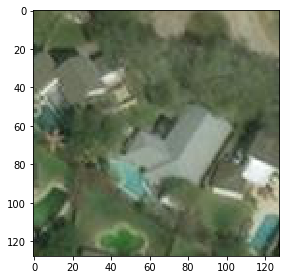

In [9]:
imshow(train_no_damage[0])

In [10]:
train_no_damage_scale = train_no_damage/128

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


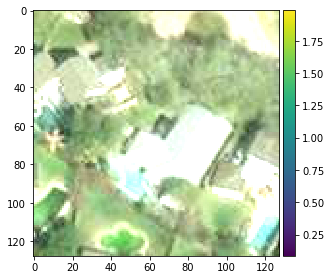

In [11]:
imshow(train_no_damage_scale[0])

In [12]:
train_damage_reshape = np.reshape(train_damage_scale,(5000,(128*128*3)))

In [13]:
df = pd.DataFrame(train_damage_reshape)

In [14]:
damage=np.ones(5000) ##if damage classify as 1 otherwise zero

In [15]:
df['labels'] = damage

In [16]:
train_no_damage_re = np.reshape(train_no_damage_scale,(5000,(128*128*3)))

In [17]:
df1 = pd.DataFrame(train_no_damage_re)

In [18]:
data =pd.concat([df, df1], axis=0)

In [19]:
data['labels'].fillna(0, inplace=True)

In [20]:
data = data.sample(frac=1).reset_index(drop=True)

In [21]:
labels = data.pop('labels')

In [22]:
X_train,Y_train  = np.array(data.values),np.array(labels) ##training Data

In [23]:
X_train.shape

(10000, 49152)

In [24]:
Y_train.shape

(10000,)

# Validation Data

In [25]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/validation_another/damage/*.jpeg")
val_damage = np.array([np.array(imread(img)) for img in path])

In [26]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/validation_another/no_damage/*.jpeg")
val_damage_no = np.array([np.array(imread(img)) for img in path])

In [27]:
val_damage_scale, val_damage_no_scale = val_damage/128 , val_damage_no/128

In [28]:
val_damage_scale.shape

(1000, 128, 128, 3)

In [29]:
val_damage_no_scale.shape

(1000, 128, 128, 3)

In [30]:
val_damage_scale_re = np.reshape(val_damage_scale,(1000,(128*128*3)))
val_damage_no_scale_re =  np.reshape(val_damage_no_scale,(1000,(128*128*3)))

In [31]:
damage=np.ones(1000)

In [32]:
df_v = pd.DataFrame(val_damage_scale_re)

In [33]:
df_v['labels'] = damage ## label 1 means damaged otherwise 0

In [34]:
df_v1 = pd.DataFrame(val_damage_no_scale_re)

In [35]:
val_data = pd.concat([df_v, df_v1], axis=0)

In [36]:
val_data['labels'].fillna(0, inplace=True)

In [37]:
val_data = val_data.sample(frac=1).reset_index(drop=True)

In [38]:
val_labels = val_data.pop('labels')

In [39]:
X_val , Y_val = np.array(val_data.values),np.array(val_labels)

In [40]:
X_val.shape

(2000, 49152)

In [41]:
Y_val.shape

(2000,)

# Test Data

In [42]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/test/damage/*.jpeg")
test_damage = np.array([np.array(imread(img)) for img in path])

In [43]:
test_damage.shape

(1000, 128, 128, 3)

In [44]:
test_damage_scale = test_damage/128

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


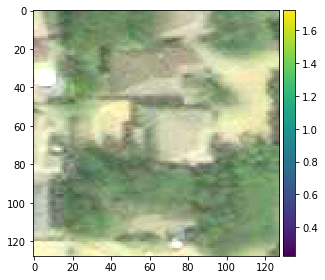

In [45]:
imshow(test_damage_scale[0])

In [46]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/test/no_damage/*.jpeg")
test_nodamage = np.array([np.array(imread(img)) for img in path])

In [47]:
test_nodamage.shape

(1000, 128, 128, 3)

In [48]:
test_nodamage_scale = test_nodamage/128

In [49]:
test_damage_re = np.reshape(test_damage_scale,(1000,(128*128*3)))
test_nodamage_re = np.reshape(test_nodamage_scale,(1000,(128*128*3)))

In [50]:
df_t = pd.DataFrame(test_damage_re)
df_t1 = pd.DataFrame(test_nodamage_re)

In [51]:
damage = np.ones(1000)

In [52]:
df_t['labels'] = damage

In [53]:
test_data = pd.concat([df_t, df_t1], axis=0)

In [54]:
test_data['labels'].fillna(0, inplace=True)

In [55]:
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [56]:
test_labels = test_data.pop('labels') 

In [57]:
X_test = np.array(test_data.values)

In [58]:
X_test.shape

(2000, 49152)

In [59]:
X_test_re = np.reshape(X_test , (2000,128,128,3))

# Reshaping Data for input to model 

In [60]:
print(X_train.shape)
print(Y_train.shape) 

(10000, 49152)
(10000,)


In [61]:
print(X_val.shape)
print(Y_val.shape)

(2000, 49152)
(2000,)


In [62]:
print(X_test.shape)

(2000, 49152)


In [63]:
X_train = np.reshape(X_train,(10000,128,128,3))
X_val = np.reshape(X_val,(2000,128,128,3))
X_test = np.reshape(X_test,(2000,128,128,3))

In [64]:
print(X_train.shape)
print(Y_train.shape) 
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)

(10000, 128, 128, 3)
(10000,)
(2000, 128, 128, 3)
(2000,)
(2000, 128, 128, 3)


# Build CNN Model

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [70]:
def build_cnn():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(128,128,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    return model

In [71]:
model = build_cnn()

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

In [73]:
model.fit(X_train, Y_train, epochs=10, validation_data = (X_val, Y_val) , verbose=1 )

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 160s 16ms/step - loss: 0.5088 - accuracy: 0.7537 - val_loss: 0.5839 - val_accuracy: 0.5510
Epoch 2/10
10000/10000 [==============================] - 156s 16ms/step - loss: 0.2823 - accuracy: 0.8887 - val_loss: 0.2472 - val_accuracy: 0.9005
Epoch 3/10
10000/10000 [==============================] - 184s 18ms/step - loss: 0.2217 - accuracy: 0.9110 - val_loss: 0.1909 - val_accuracy: 0.9215
Epoch 4/10
10000/10000 [==============================] - 171s 17ms/step - loss: 0.1860 - accuracy: 0.9300 - val_loss: 0.3013 - val_accuracy: 0.9025
Epoch 5/10
10000/10000 [==============================] - 168s 17ms/step - loss: 0.1682 - accuracy: 0.9388 - val_loss: 0.2107 - val_accuracy: 0.9185
Epoch 6/10
10000/10000 [==============================] - 173s 17ms/step - loss: 0.1510 - accuracy: 0.9463 - val_loss: 0.3195 - val_accuracy: 0.9140
Epoch 7/10
10000/10000 [==============================] -